In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Text(0, 0.5, '$P_X(x)$')

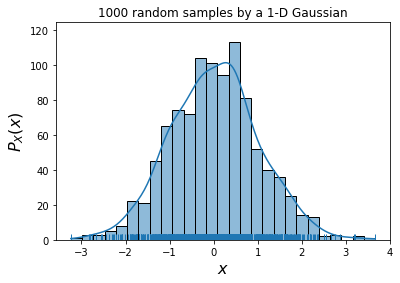

In [2]:
# Plot 1-D gaussian
n = 1         # n number of independent 1-D gaussian 
m= 1000       # m points in 1-D gaussian 
f_random = np.random.normal(size=(n, m)) 

for i in range(n):
    #sns.distplot(f_random[i], hist=True, rug=True, vertical=True, color="orange")
    sns.histplot(f_random[i], kde=True)
    sns.rugplot(f_random[i])

plt.title('1000 random samples by a 1-D Gaussian')

plt.xlabel('$x$', fontsize = 16)
plt.ylabel('$P_X(x)$', fontsize = 16)

Text(0, 0.5, '$x$')

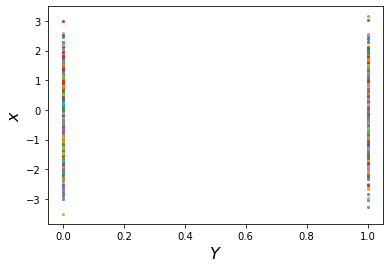

In [3]:
n = 2          
m = 1000
f_random = np.random.normal(size=(n, m))

Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

plt.clf()
plt.plot(Xshow, f_random, 'o', linewidth=1, markersize=1, markeredgewidth=2)

plt.xlabel(r'$Y$', fontsize = 16)
plt.ylabel(r'$x$', fontsize = 16)

Text(0, 0.5, '$x$')

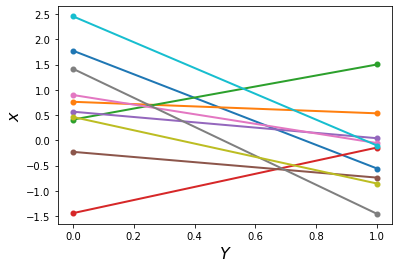

In [6]:
n = 2          
m = 10
f_random = np.random.normal(size=(n, m))

Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

plt.clf()
plt.plot(Xshow, f_random, '-o', linewidth=2, markersize=4, markeredgewidth=2)
plt.xlabel(r'$Y$', fontsize = 16)
plt.ylabel(r'$x$', fontsize = 16)

Text(0, 0.5, '$x$')

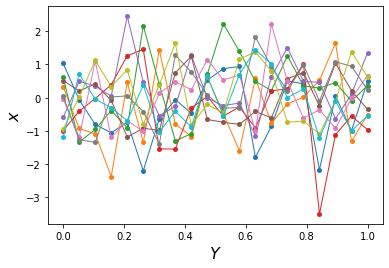

In [7]:
n = 20          
m = 10
f_random = np.random.normal(size=(n, m))

Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

plt.clf()
plt.plot(Xshow, f_random, '-o', linewidth=1, markersize=3, markeredgewidth=2)

plt.xlabel(r'$Y$', fontsize = 16)
plt.ylabel(r'$x$', fontsize = 16)


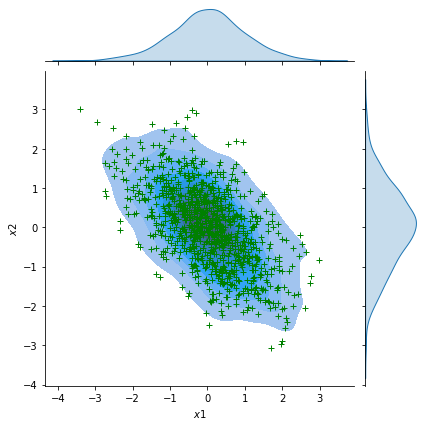

In [8]:
mean, cov = [0., 0.], [(1., -0.6), (-0.6, 1.)]
data = np.random.multivariate_normal(mean, cov, 1000)
df = pd.DataFrame(data, columns=["x1", "x2"])
g = sns.jointplot(data=df, x="x1", y="x2", kind="kde", fill=True)



g.plot_joint(plt.scatter, c="g", s=30, linewidth=1, marker="+")

g.set_axis_labels("$x1$", "$x2$")

# g.ax_joint.legend_.remove()
plt.show()

<Figure size 432x288 with 0 Axes>

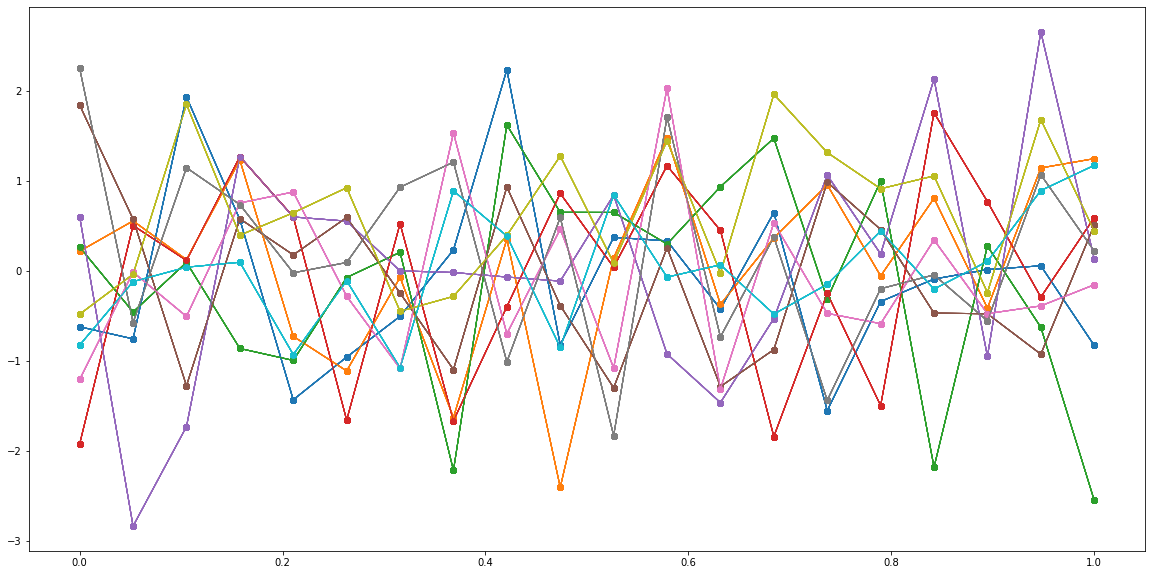

In [17]:
n = 20 
m = 10

mean = np.zeros(n)
cov = np.eye(n)

f_prior = np.random.multivariate_normal(mean, cov, m).T


plt.clf()
plt.figure(figsize=(20,10))
Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

for i in range(m):
    plt.plot(Xshow, f_prior, '-o', linewidth=1)

In [18]:
# Define the kernel
def kernel(a, b):
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return np.exp(-.5 * sqdist)

<Figure size 432x288 with 0 Axes>

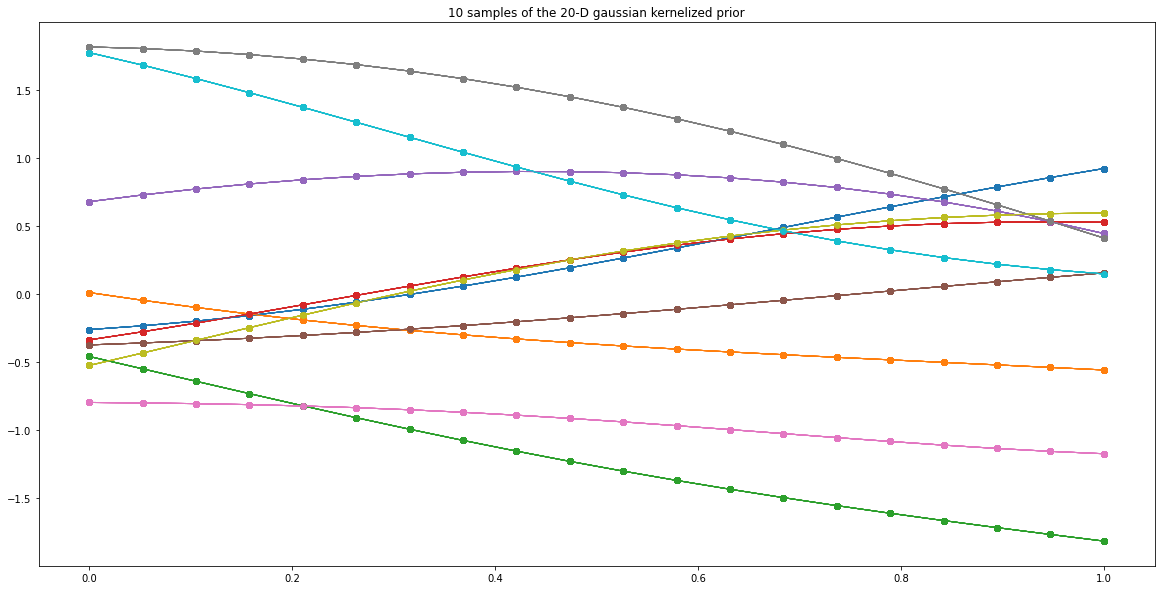

In [19]:
n = 20  
m = 10

Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

K_ = kernel(Xshow, Xshow)                  # k(x_star, x_star)        

mean = np.zeros(n)
cov = np.eye(n)

f_prior = np.random.multivariate_normal(mean, K_, m).T

plt.clf()
plt.figure(figsize=(20,10))

Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

for i in range(m):
    plt.plot(Xshow, f_prior, '-o', linewidth=1)
    
plt.title('10 samples of the 20-D gaussian kernelized prior')
plt.show()

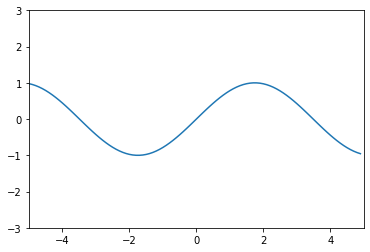

In [20]:
# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()
x = np.arange(-5, 5, 0.1)

plt.plot(x, f(x))
plt.axis([-5, 5, -3, 3])
plt.show()

In [21]:
# Define the kernel
def kernel(a, b):
    kernelParameter_l = 0.1
    kernelParameter_sigma = 1.0
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return kernelParameter_sigma*np.exp(-.5 * (1/kernelParameter_l) * sqdist)

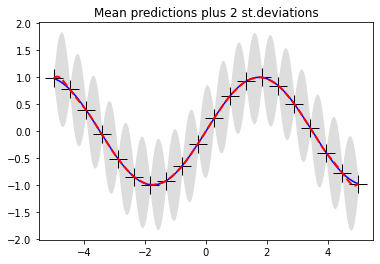

In [25]:
# Sample some input points and noisy versions of the function evaluated at
# these points. 
N = 20        # number of existing observation points (training points).
n = 200        # number of test points.
s = 0.00005    # noise variance.

X = np.linspace(-5, 5, N).reshape(-1,1)     # N training points 
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))     # line 1 

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))   # k_star = kernel(X, Xtest), calculating v := l\k_star
mu = np.dot(Lk.T, np.linalg.solve(L, y))    # \alpha = np.linalg.solve(L, y) 

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)                  # k(x_star, x_star)        
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)   
s = np.sqrt(s2)

# PLOTS:
plt.figure(1)
plt.clf()
plt.plot(X, y, 'k+', ms=18)
plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu-2*s, mu+2*s, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
#plt.savefig('predictive.png', bbox_inches='tight', dpi=300)
plt.title('Mean predictions plus 2 st.deviations')
plt.show()
#plt.axis([-5, 5, -3, 3])

<Figure size 432x288 with 0 Axes>

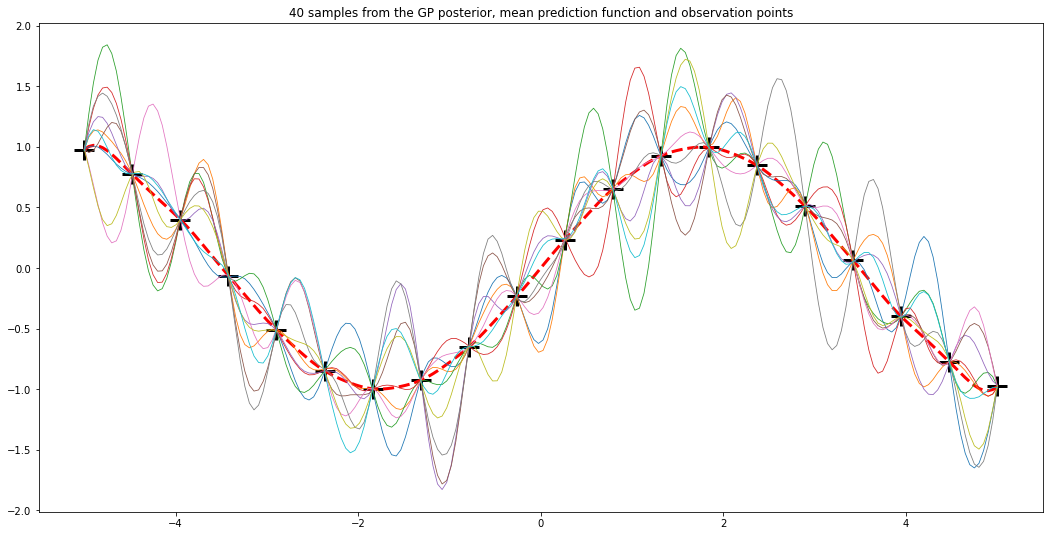

In [28]:
# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))  # size=(n, m), m shown how many posterior  
plt.figure(3)
plt.clf()
plt.figure(figsize=(18,9))
plt.plot(X, y, 'k+', markersize=20, markeredgewidth=3)
plt.plot(Xtest, mu, 'r--', linewidth=3)
plt.plot(Xtest, f_post, linewidth=0.8)
plt.title('40 samples from the GP posterior, mean prediction function and observation points')
plt.show()